In [20]:
import time

import numpy as np
import pandas as pd
import datetime as dt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.metrics import plot_roc_curve
# import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

# Basic models
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
# from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [2]:
pd.set_option('display.max_columns', None)
PATH_DATA_RAW= '../Data/Raw/'
PATH_DATA_CLEAN = '../Data/Clean/'

In [3]:
df = pd.read_csv(PATH_DATA_CLEAN+'train_clean2.csv')
df.sample(5)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays,total_guests,kids,guest_location,RateSpecialReq_to_TotalGuest,cancelrate_byMarket,arrival_date,cancel_or_stay_length,park_car_req
72515,1,123,2019,May,19,12,2,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,162.00,0,2,Canceled,2019-03-07,2,3,1,International,0.666667,0.367236,2019-05-12,66,No
57013,1,109,2018,October,43,20,2,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,118.80,0,0,Canceled,2018-07-11,3,2,0,International,0.000000,0.367236,2018-10-20,101,No
2561,0,154,2019,January,4,27,2,BB,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,1,0,Transient,143.84,0,1,Check-Out,2019-02-02,6,4,2,International,0.250000,0.367236,2019-01-27,6,No
67486,1,54,2017,August,35,24,3,BB,Direct,Direct,0,0,0,E,E,1,No Deposit,0,0,Transient,196.00,0,1,Canceled,2017-07-29,7,3,0,Local,0.333333,0.154849,2017-08-24,26,No
58009,1,2,2019,January,3,15,3,BB,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,1,0,Transient,126.01,0,3,No-Show,2019-01-15,4,3,0,International,1.000000,0.367236,2019-01-15,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82601 entries, 0 to 82600
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     82601 non-null  int64  
 1   lead_time                       82601 non-null  int64  
 2   arrival_date_year               82601 non-null  int64  
 3   arrival_date_month              82601 non-null  object 
 4   arrival_date_week_number        82601 non-null  int64  
 5   arrival_date_day_of_month       82601 non-null  int64  
 6   adults                          82601 non-null  int64  
 7   meal                            82601 non-null  object 
 8   market_segment                  82601 non-null  object 
 9   distribution_channel            82601 non-null  object 
 10  is_repeated_guest               82601 non-null  int64  
 11  previous_cancellations          82601 non-null  int64  
 12  previous_bookings_not_canceled  

In [5]:
fitur = ['lead_time','adults', 'meal', 'market_segment', 'distribution_channel','is_repeated_guest',
         'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type','assigned_room_type',
         'booking_changes','deposit_type','agent','customer_type','days_in_waiting_list','park_car_req',
         'adr','total_of_special_requests','total_stays','total_guests','kids','guest_location',
         'RateSpecialReq_to_TotalGuest','cancelrate_byMarket']
target = ['is_canceled']

In [6]:
df1 = df[fitur]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82601 entries, 0 to 82600
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       82601 non-null  int64  
 1   adults                          82601 non-null  int64  
 2   meal                            82601 non-null  object 
 3   market_segment                  82601 non-null  object 
 4   distribution_channel            82601 non-null  object 
 5   is_repeated_guest               82601 non-null  int64  
 6   previous_cancellations          82601 non-null  int64  
 7   previous_bookings_not_canceled  82601 non-null  int64  
 8   reserved_room_type              82601 non-null  object 
 9   assigned_room_type              82601 non-null  object 
 10  booking_changes                 82601 non-null  int64  
 11  deposit_type                    82601 non-null  object 
 12  agent                           

In [7]:
#Encoding feature
df_encoded = pd.get_dummies(df1, columns=['meal', 'market_segment', 'distribution_channel', 
                                          'reserved_room_type', 'assigned_room_type', 'deposit_type',
                                          'customer_type', 'park_car_req', 'guest_location'],
                                          prefix=['meal', 'market_segment', 'distribution_channel', 
                                          'reserved_room_type', 'assigned_room_type', 'deposit_type',
                                          'customer_type', 'park_car_req', 'guest_location'])
# Menggabungkan DataFrame hasil encoding ke DataFrame asli
df1 = pd.concat([df1, df_encoded], axis=1)
df1.info()
df1.drop(['meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 
           'assigned_room_type', 'deposit_type', 'customer_type', 'park_car_req',
           'guest_location'], axis=1, inplace=True)

# Mendapatkan daftar nama kolom yang duplikat
duplicate_columns = df1.columns[df1.columns.duplicated()]

# Menghapus kolom yang duplikat dari DataFrame
df1 = df1.loc[:, ~df1.columns.duplicated()]

# Menampilkan DataFrame setelah menghapus kolom duplikat
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82601 entries, 0 to 82600
Data columns (total 86 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       82601 non-null  int64  
 1   adults                          82601 non-null  int64  
 2   meal                            82601 non-null  object 
 3   market_segment                  82601 non-null  object 
 4   distribution_channel            82601 non-null  object 
 5   is_repeated_guest               82601 non-null  int64  
 6   previous_cancellations          82601 non-null  int64  
 7   previous_bookings_not_canceled  82601 non-null  int64  
 8   reserved_room_type              82601 non-null  object 
 9   assigned_room_type              82601 non-null  object 
 10  booking_changes                 82601 non-null  int64  
 11  deposit_type                    82601 non-null  object 
 12  agent                           

In [43]:
# Transformasi data
# from scipy.stats import boxcox
# data1 = df['lead_time']
# data2 = df['adr']
# transformed_data1, lambda_value1 = boxcox(data1 + 1)
# transformed_data2, lambda_value2 = boxcox(data2 + 1)
# df['lead_time_transform'] = transformed_data1
# df['adr_transform'] = transformed_data2

In [44]:
# Initialize X, y and split dataset
X = df1
y = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Text(0.5, 0, 'Top 20 Feature Importance (%)')

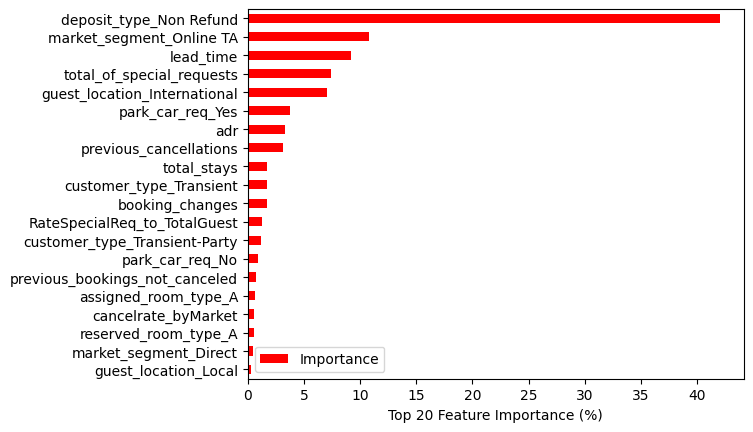

In [45]:
clf_rf = DecisionTreeClassifier(max_depth=12).fit(X_train, y_train)
pd.DataFrame(data = clf_rf.feature_importances_ * 100, 
             columns = ['Importance'], 
             index = X_train.columns)\
                .sort_values('Importance', ascending=True)[-20:]\
                .plot(kind='barh', color='r')

plt.xlabel("Top 20 Feature Importance (%)")

In [11]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

def sampler_compare(samplers, X_train, y_train, X_test, y_test):
    accus, accu_balanceds = [], []

    for sampler in samplers.values():
        X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train)
        ## Test by logistic regression accuracy
        logit = LogisticRegression(solver='liblinear')
        clf = logit.fit(X_train, y_train)
        accu = roc_auc_score(y_test, clf.predict(X_test))
        clf_balanced = logit.fit(X_train_balanced, y_train_balanced)
        accu_balanced = roc_auc_score(y_test, clf.predict(X_test))

        accus.append(accu)
        accu_balanceds.append(accu_balanced)

    return accus, accu_balanceds

# Contoh penggunaan
samplers = {'Undersample': RandomUnderSampler(random_state=0),
           'Oversample': RandomOverSampler(random_state=0),
           'SMOTE': SMOTE(random_state=0)}

# Pastikan Anda sudah memiliki X_train, y_train, X_test, y_test
accus, accu_balanceds = np.round(sampler_compare(samplers, X_train, y_train, X_test, y_test), 4)


In [13]:
## Output comparsion table
table = pd.DataFrame({"Balancing Method": samplers.keys(), 
                      "Accuracy (imbalanced)": accus, 
                      "Accuracy (balanced)": accu_balanceds})

pd.pivot_table(table, index=['Balancing Method'])\
    .sort_values(by="Accuracy (balanced)", ascending=False)

,Accuracy (balanced),Accuracy (imbalanced)
Balancing Method,,
Oversample,0.7974,0.7764
Undersample,0.7974,0.7764
SMOTE,0.7918,0.7764


In [14]:
X_train_balanced, y_train_balanced = RandomUnderSampler().fit_resample(X_train, y_train)
print(X_train_balanced.shape)
print(y_train_balanced.shape)

(48994, 62)
(48994,)


In [15]:
rf_para = {'n_estimators': [100, 300, 500],
           'max_features': ['auto', 'sqrt', 'log2'],
           'min_samples_split': [2, 5, 10]}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, rf_para, cv=5, n_jobs=-1, verbose=3, return_train_score=True)
# rf_cv.fit(X_train[:1000], y_train[:1000])
rf_cv.fit(X_train, y_train)
print("Best paramters (RF): {}".format(rf_cv.best_params_))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\ramad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ramad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ramad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\ramad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.p

Best paramters (RF): {'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 500}


In [16]:
nn_para = {'alpha': [1, 0.1, 0.01, 0.001],
           'hidden_layer_sizes': [(50,50,50), (100,100)],
           'solver': ["adam", "sgd"],
           'activation': ["logistic", "relu"]}

nn = MLPClassifier()
nn_cv = GridSearchCV(nn, nn_para, cv=5, n_jobs=-1, verbose=2)
nn_cv.fit(X_train, y_train)
print("Best paramters (NN): {}".format(nn_cv.best_params_))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best paramters (NN): {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}


In [21]:
hyperparameters = {
    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
    'tree_method' : ['auto', 'exact', 'approx', 'hist'],
    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],
    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

xg_tuned = XGBClassifier()
xg_tuned_model = RandomizedSearchCV(xg_tuned, hyperparameters, cv=5, scoring='accuracy', verbose=3, return_train_score=True)
xg_tuned_model.fit(X_train,y_train)
print("Best paramters (XGBoost): {}".format(xg_tuned_model.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END alpha=0.5, colsample_bytree=0.30000000000000004, eta=1.0, gamma=0.1, lambda=0.30000000000000004, max_depth=50, min_child_weight=18, tree_method=hist;, score=(train=nan, test=nan) total time=   1.2s
[CV 2/5] END alpha=0.5, colsample_bytree=0.30000000000000004, eta=1.0, gamma=0.1, lambda=0.30000000000000004, max_depth=50, min_child_weight=18, tree_method=hist;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END alpha=0.5, colsample_bytree=0.30000000000000004, eta=1.0, gamma=0.1, lambda=0.30000000000000004, max_depth=50, min_child_weight=18, tree_method=hist;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END alpha=0.5, colsample_bytree=0.30000000000000004, eta=1.0, gamma=0.1, lambda=0.30000000000000004, max_depth=50, min_child_weight=18, tree_method=hist;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END alpha=0.5, colsample_bytree=0.30000000000000004, eta=1.0, gamma=0.1, lambda=0.3000

c:\Users\ramad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ramad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ramad\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\ramad\AppData\Local\Programs\Python\Python311\Lib\site-packages

Best paramters (XGBoost): {'tree_method': 'auto', 'min_child_weight': 12, 'max_depth': 10, 'lambda': 0.9, 'gamma': 0.9, 'eta': 0.29292929292929293, 'colsample_bytree': 0.7000000000000001, 'alpha': 0.0}


In [37]:
def compute(name, model, X_train, X_test, y_train, y_test):

    fpr, tpr = [], []
    accu = auc = exectime = 0

    start = time.process_time()
    clf = model.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)[:, 1]
    y_pred = clf.predict(X_test)

    exectime = round(time.process_time() - start, 4)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    accu = round(accuracy_score(y_test,y_pred), 4)
    auc = round(roc_auc_score(y_test, y_prob), 4)
    cm = confusion_matrix(y_test, y_pred)

    ## Plot accuracy, AUC and confusion matrix
    print("# {}:\nAccuracy Score: {}\nAUC Score: {}\nConfusion Matrix:\n{}"
            .format(name, accu, auc, cm))
    print("-------------------- \n")

    return fpr, tpr, accu, auc, exectime

def implement(models, X_train, X_test, y_train, y_test, balanced=False):

    accus, aucs, times, fprs, tprs = [], [], [], [], []

    for name, model in models.items():

        ## XGBoost requires the same column number of training and test set
        if name == "XGBoost" and name == "XGBoost_tune_resample" and balanced == True:
            X_test_balanced, y_test_balanced = RandomUnderSampler().fit_resample(X_test, y_test)
            fpr, tpr, accu, auc, exectime = \
                compute(name, model, X_train, X_test_balanced, y_train, y_test_balanced)
        ## Neural Network prefers standardization
        elif name == "Neural Network (vanilla)" or "Neural Network (tuned)":
            scaler = StandardScaler()
            scaler.fit(X_train)
            X_train_scaled = scaler.transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            fpr, tpr, accu, auc, exectime = \
                compute(name, model, X_train_scaled, X_test_scaled, y_train, y_test)
        else:
            fpr, tpr, accu, auc, exectime = \
                compute(name, model, X_train, X_test, y_train, y_test)

        fprs.append(fpr)
        tprs.append(tpr)
        times.append(exectime)
        accus.append(accu)
        aucs.append(auc)

    return accus, aucs, times, fprs, tprs

def plot_ROC(fprs, tprs, aucs, names):

    plt.figure(0).clf()

    for fpr, tpr, name, auc in zip(fprs, tprs, names, aucs):
        plt.plot(fpr, tpr, label=name+" (AUC="+str(auc)+")")

    ## Plot ROC comparison
    plt.legend(loc=0)
    plt.title("Comparison of Models by ROC")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")

In [40]:
## Dictionary: {model name -- classifier}
models = {"Logistic Regression (baseline)": LogisticRegression(solver='liblinear'),
 "Decisioion Tree": DecisionTreeClassifier(max_depth=12),
 "Random Forest (vanilla)": RandomForestClassifier(),
 "Random Forest (Tuned)": RandomForestClassifier(max_features='sqrt',
                                                 min_samples_split=5,
                                                 n_estimators=500),
 "Extra Trees": ExtraTreesClassifier(min_samples_leaf=7,
                                     min_samples_split=2,
                                     n_estimators=500),
 "Neural Network (vanilla)": MLPClassifier(),
 "Neural Network (Tuned)": MLPClassifier(alpha=0.01,
                                         hidden_layer_sizes=(100,100),
                                         solver='adam',
                                         activation='relu'),
#  "Gaussian Naive Bayes": GaussianNB(),
 "XGBoost": XGBClassifier(),
 "XGBoost_tune": XGBClassifier(tree_method='auto',
                               min_child_weight=12, 
                               max_depth=10,
                               lambda_val=0.9,
                               gamma_val=0.9,
                               eta_val=0.29292929292929293,
                               colsample_bytree_val=0.7000000000000001,
                               alpha_val=0.0),
 "XGBoost_tune_resample": XGBClassifier(tree_method='auto',
                               min_child_weight=12, 
                               max_depth=10,
                               lambda_val=0.9,
                               gamma_val=0.9,
                               eta_val=0.29292929292929293,
                               colsample_bytree_val=0.7000000000000001,
                               alpha_val=0.0),
 "AdaBoost": AdaBoostClassifier(n_estimators=500)}
 

In [31]:
accus, aucs, times, fprs, tprs = implement(models, X_train, X_test, y_train, y_test, False)

# Logistic Regression (baseline):
Accuracy Score: 0.811
AUC Score: 0.8901
Confusion Matrix:
[[9454  936]
 [2186 3945]]
-------------------- 

# Decisioion Tree:
Accuracy Score: 0.8352
AUC Score: 0.9136
Confusion Matrix:
[[9245 1145]
 [1577 4554]]
-------------------- 

# Random Forest (vanilla):
Accuracy Score: 0.8652
AUC Score: 0.9385
Confusion Matrix:
[[9497  893]
 [1334 4797]]
-------------------- 

# Random Forest (Tuned):
Accuracy Score: 0.8686
AUC Score: 0.9408
Confusion Matrix:
[[9539  851]
 [1320 4811]]
-------------------- 

# Extra Trees:
Accuracy Score: 0.8457
AUC Score: 0.922
Confusion Matrix:
[[9571  819]
 [1731 4400]]
-------------------- 



c:\Users\ramad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Neural Network (vanilla):
Accuracy Score: 0.8446
AUC Score: 0.9257
Confusion Matrix:
[[9129 1261]
 [1306 4825]]
-------------------- 



c:\Users\ramad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Neural Network (Tuned):
Accuracy Score: 0.8498
AUC Score: 0.9256
Confusion Matrix:
[[9289 1101]
 [1381 4750]]
-------------------- 

# XGBoost:
Accuracy Score: 0.8622
AUC Score: 0.9364
Confusion Matrix:
[[9482  908]
 [1369 4762]]
-------------------- 

[22:27:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "alpha_val", "colsample_bytree_val", "eta_val", "gamma_val", "lambda_val" } are not used.

# XGBoost_tune:
Accuracy Score: 0.8634
AUC Score: 0.9387
Confusion Matrix:
[[9471  919]
 [1338 4793]]
-------------------- 

# AdaBoost:
Accuracy Score: 0.8245
AUC Score: 0.9046
Confusion Matrix:
[[9420  970]
 [1930 4201]]
-------------------- 



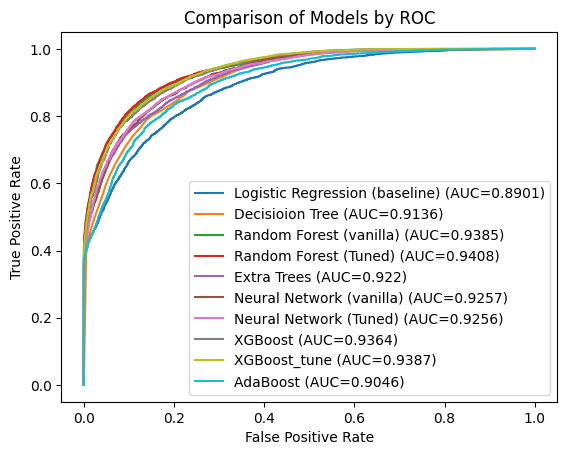

In [32]:
plot_ROC(fprs, tprs, aucs, models.keys())

In [41]:
accus_b, aucs_b, times_b, fprs_b, tprs_b = implement(models, X_train_balanced, X_test, y_train_balanced, y_test, True)

# Logistic Regression (baseline):
Accuracy Score: 0.8023
AUC Score: 0.8905
Confusion Matrix:
[[8495 1895]
 [1371 4760]]
-------------------- 

# Decisioion Tree:
Accuracy Score: 0.8223
AUC Score: 0.9085
Confusion Matrix:
[[8523 1867]
 [1068 5063]]
-------------------- 

# Random Forest (vanilla):
Accuracy Score: 0.8534
AUC Score: 0.9366
Confusion Matrix:
[[8896 1494]
 [ 928 5203]]
-------------------- 

# Random Forest (Tuned):
Accuracy Score: 0.8574
AUC Score: 0.9389
Confusion Matrix:
[[8965 1425]
 [ 931 5200]]
-------------------- 

# Extra Trees:
Accuracy Score: 0.8273
AUC Score: 0.921
Confusion Matrix:
[[8667 1723]
 [1130 5001]]
-------------------- 



c:\Users\ramad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Neural Network (vanilla):
Accuracy Score: 0.8331
AUC Score: 0.9239
Confusion Matrix:
[[8681 1709]
 [1049 5082]]
-------------------- 



c:\Users\ramad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Neural Network (Tuned):
Accuracy Score: 0.8288
AUC Score: 0.9223
Confusion Matrix:
[[8456 1934]
 [ 894 5237]]
-------------------- 

# XGBoost:
Accuracy Score: 0.846
AUC Score: 0.934
Confusion Matrix:
[[8803 1587]
 [ 957 5174]]
-------------------- 

[22:49:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "alpha_val", "colsample_bytree_val", "eta_val", "gamma_val", "lambda_val" } are not used.

# XGBoost_tune:
Accuracy Score: 0.8501
AUC Score: 0.9371
Confusion Matrix:
[[8836 1554]
 [ 922 5209]]
-------------------- 

[22:49:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "alpha_val", "colsample_bytree_val", "eta_val", "gamma_val", "lambda_val" } are not used.

# XGBoost_tune_resample:
Accuracy Score: 0.8501
AUC Score: 0.9371
Confusion Matrix:
[[8836 1554]
 [ 

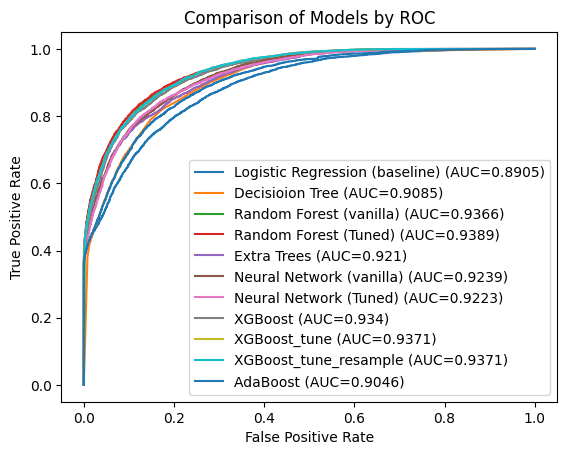

In [42]:
plot_ROC(fprs_b, tprs_b, aucs_b, models.keys())